In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [3]:
# Read the data
X = np.array([[50,30], [24,10], [85,70], [71,80], [60,78], [70,55], [28,91]])
data = pd.read_csv("data.csv", sep=';')
indexes = ["x" + str(i + 1) for i in range(len(data))]
data.head()

,X,Y
0,50,30
1,24,10
2,85,70
3,71,80
4,60,78


Text(0, 0.5, 'Y')

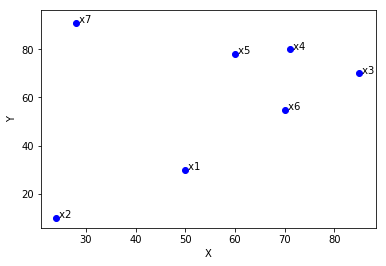

In [4]:
# Plot the data with labels
fig, ax = plt.subplots()
for index, row in data.iterrows():
    ax.scatter(row['X'], row['Y'], color='b')
    ax.text(row['X'], row['Y'], " x" + str(index + 1))
ax.set_xlabel('X')
ax.set_ylabel('Y')


In [5]:
# Apply hierarchical clustering
Z = linkage(X, method='single') # or complete


{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [25.0, 25.0, 43.75, 43.75],
  [15.0, 15.0, 34.375, 34.375],
  [5.0, 5.0, 24.6875, 24.6875]],
 'dcoord': [[0.0, 11.180339887498949, 11.180339887498949, 0.0],
  [0.0, 17.204650534085253, 17.204650534085253, 11.180339887498949],
  [0.0, 21.213203435596427, 21.213203435596427, 17.204650534085253],
  [0.0, 32.01562118716424, 32.01562118716424, 21.213203435596427],
  [0.0, 32.802438933713454, 32.802438933713454, 32.01562118716424],
  [0.0, 34.539832078341085, 34.539832078341085, 32.802438933713454]],
 'ivl': ['x7', 'x2', 'x1', 'x6', 'x3', 'x4', 'x5'],
 'leaves': [6, 1, 0, 5, 2, 3, 4],
 'color_list': ['g', 'g', 'g', 'g', 'g', 'g']}

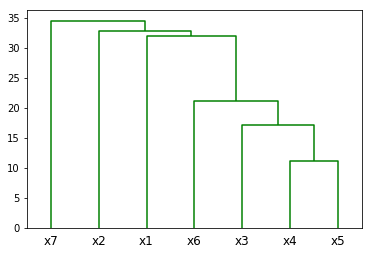

In [6]:
# Plot the dendrogram
fig, ax = plt.subplots()
dendrogram(Z, labels = indexes, color_threshold=100)


In [7]:
# Get the labels for 3 clusters
labels = fcluster(Z, 3, criterion='maxclust')
print(labels)


[1 2 1 1 1 1 3]


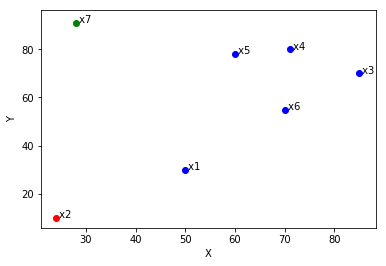

In [8]:
# Plot the data with labels
fig, ax = plt.subplots()
for index, row in data.iterrows():
    ax.scatter(row['X'], row['Y'], color=['b', 'r', 'g'][labels[index] - 1])
    ax.text(row['X'], row['Y'], " x" + str(index + 1))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()
